
# Load

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.impute import MissingIndicator
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import SimpleExpSmoothing

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, roc_auc_score
from scipy import stats
#%pylab inline

In [46]:
# Url of the raw xls file on GitHub
url = 'https://raw.githubusercontent.com/avladova/Student-performance-prediction/main/Scores.csv'
# Read the xls file into a DataFrame
raw = pd.read_csv(url)
raw.drop(columns='Num', inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sex                            50 non-null     object 
 1   Group                          50 non-null     int64  
 2   Campus work 1                  50 non-null     float64
 3   Programming skills 1           50 non-null     int64  
 4   Activity 1                     33 non-null     float64
 5   Test 1                         50 non-null     float64
 6   Project 1                      50 non-null     float64
 7   Bonus task 1                   50 non-null     int64  
 8   Attestation 1                  50 non-null     int64  
 9   Campus work 2                  50 non-null     float64
 10  Programming skills 2           24 non-null     float64
 11  Activity 2                     28 non-null     float64
 12  Test 2                         50 non-null     float

## Omissions

In [47]:
raw.fillna(0, inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sex                            50 non-null     object 
 1   Group                          50 non-null     int64  
 2   Campus work 1                  50 non-null     float64
 3   Programming skills 1           50 non-null     int64  
 4   Activity 1                     50 non-null     float64
 5   Test 1                         50 non-null     float64
 6   Project 1                      50 non-null     float64
 7   Bonus task 1                   50 non-null     int64  
 8   Attestation 1                  50 non-null     int64  
 9   Campus work 2                  50 non-null     float64
 10  Programming skills 2           50 non-null     float64
 11  Activity 2                     50 non-null     float64
 12  Test 2                         50 non-null     float

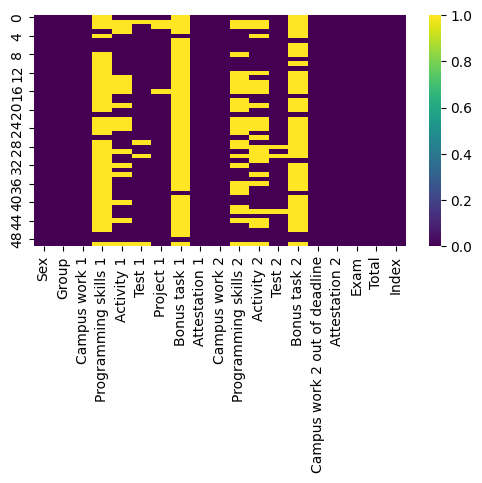

In [48]:
plt.figure(figsize=(6, 3))
sns.heatmap(raw==0, cmap='viridis')
plt.show()

## Wordcloud

In [49]:
cols = ['Campus work 1', 'Project 1', 'Test 1', 'Campus work 2', 'Test 2', 'Exam', 'Total']
frm=raw[cols].copy()
counts=pd.concat([frm['Campus work 1'], frm['Project 1'], frm['Test 1'], frm['Campus work 2'], frm['Test 2'], frm['Exam'], frm['Total']]).value_counts()
counts.index = counts.index.map(str)

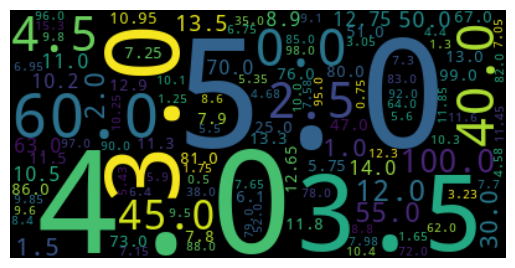

In [50]:
wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Correlation

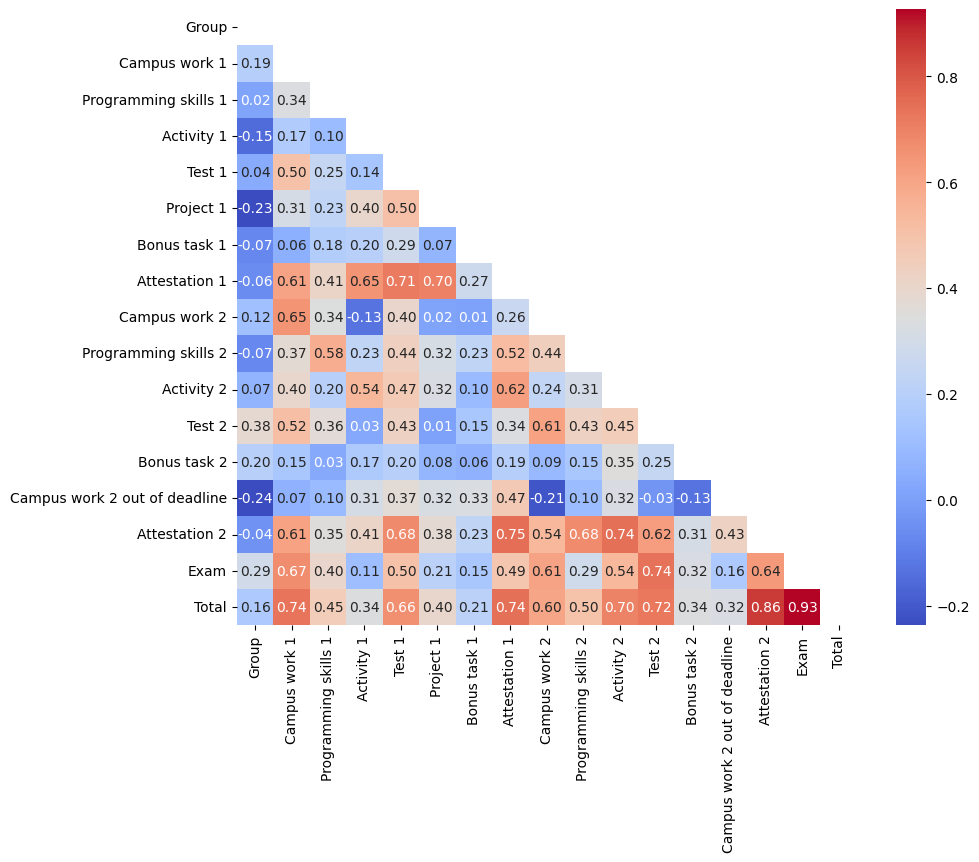

In [51]:
corr_matrix = raw.corr(numeric_only=True)

# Create a mask to hide the lower triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the upper triangle of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

## Distributions

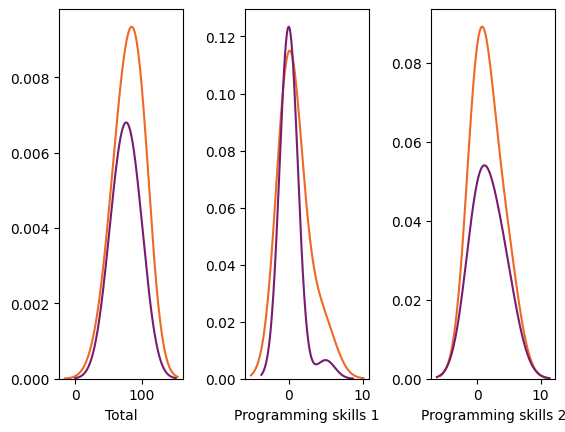

In [52]:
# Create subplots for the distribution plots
fig, axes = plt.subplots(1, 3)

# Plot the first distribution using kdeplot
sns.kdeplot(data=raw, x="Total", hue='Sex', palette='inferno', ax=axes[0], bw_adjust=2)
axes[0].set_ylabel('')
axes[0].get_legend().remove()

# Plot the second distribution using kdeplot
sns.kdeplot(data=raw, x="Programming skills 1", hue='Sex', palette='inferno', ax=axes[1], bw_adjust=2)
axes[1].set_ylabel('')
axes[1].get_legend().remove()

# Plot the third distribution using kdeplot
sns.kdeplot(data=raw, x="Programming skills 2", hue='Sex', palette='inferno', ax=axes[2], bw_adjust=2)
axes[2].set_ylabel('')
axes[2].get_legend().remove()
plt.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots
plt.show()

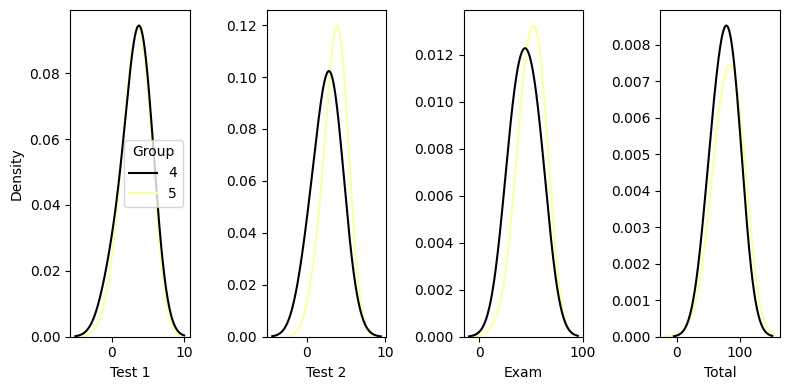

In [53]:
# Create subplots for the distribution plots
fig, axes = plt.subplots(1, 4, figsize=(8, 4))  # Adjust the figsize as per your preference

# Plot the first distribution using kdeplot
sns.kdeplot(data=raw, x="Test 1", hue='Group', palette='inferno', ax=axes[0], bw_adjust=2)

# Plot the second distribution using kdeplot
sns.kdeplot(data=raw, x="Test 2", hue='Group', palette='inferno', ax=axes[1], warn_singular=False, bw_adjust=2)
axes[1].set_ylabel('')
axes[1].get_legend().remove()
# Plot the third distribution using kdeplot
sns.kdeplot(data=raw, x="Exam", hue='Group', palette='inferno', ax=axes[2], bw_adjust=2)
axes[2].set_ylabel('')
axes[2].get_legend().remove()
# Plot the fourth distribution using kdeplot
sns.kdeplot(data=raw, x="Total", hue='Group', palette='inferno', ax=axes[3], bw_adjust=2)
axes[3].set_ylabel('')
axes[3].get_legend().remove()
plt.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots
plt.tight_layout()
plt.show()


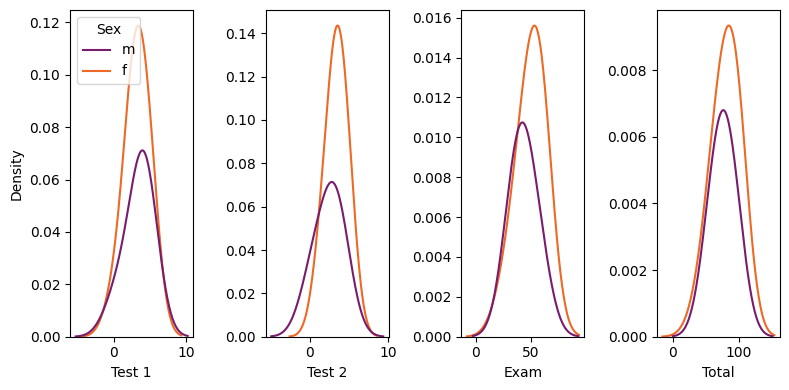

In [54]:
# Create subplots for the distribution plots
fig, axes = plt.subplots(1, 4, figsize=(8, 4))  # Adjust the figsize as per your preference

# Plot the first distribution using kdeplot
sns.kdeplot(data=raw, x="Test 1", hue='Sex', palette='inferno', ax=axes[0], bw_adjust=2)

# Plot the second distribution using kdeplot
sns.kdeplot(data=raw, x="Test 2", hue='Sex', palette='inferno', ax=axes[1], bw_adjust=2)
axes[1].set_ylabel('')
axes[1].get_legend().remove()
# Plot the third distribution using kdeplot
sns.kdeplot(data=raw, x="Exam", hue='Sex', palette='inferno', ax=axes[2], bw_adjust=2)
axes[2].set_ylabel('')
axes[2].get_legend().remove()
# Plot the fourth distribution using kdeplot
sns.kdeplot(data=raw, x="Total", hue='Sex', palette='inferno', ax=axes[3], bw_adjust=2)
axes[3].set_ylabel('')
axes[3].get_legend().remove()
plt.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots
plt.tight_layout()
plt.show()

In [55]:
dff=raw.copy()

In [56]:
cols_to_normalize = ['Campus work 1', 'Project 1', 'Test 1', 'Campus work 2', 'Test 2', 'Exam', 'Total', 'Attestation 1','Attestation 2']
dff[cols_to_normalize] = dff[cols_to_normalize].apply(lambda x: x / np.max(x))

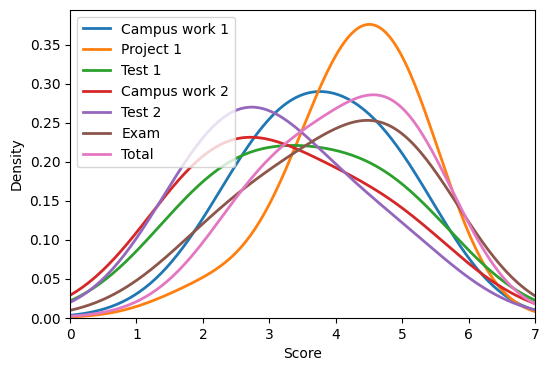

In [57]:
cols = ['Campus work 1', 'Project 1', 'Test 1', 'Campus work 2', 'Test 2', 'Exam', 'Total']
# Create a new figure
plt.figure(figsize=(6, 4))

for col in cols:
    new_col_name = col + '_score'
    dff[new_col_name] = pd.cut(dff[col], bins=[-0.5, 0.5, 0.7, 0.8, 1.0], labels=[2, 3, 4, 5]).astype(int)
    sns.kdeplot(data=dff, x=new_col_name, bw_adjust=2, label=col, linewidth=2)  # Plot all distributions on the same plot

plt.xlim(0, 7)  # Set the lower limit of the x-axis to 0
plt.legend()
plt.xlabel('Score')
plt.show()

cols=['Attestation 1','Attestation 2']
for col in cols:
    new_col_name = col + '_score'
    dff[new_col_name] = pd.cut(dff[col], bins=[-0.5, 0.5, 0.7, 0.8, 1.0], labels=[2, 3, 4, 5]).astype(int)

# Feature engineering

In [58]:
dfrm=raw.copy()
dfrm.set_index(['Index'],inplace=True)
dfrm = pd.get_dummies(dfrm, columns=['Sex'], prefix=['Sex'], drop_first=True)
dfrm.head(2)

,Group,Campus work 1,Programming skills 1,Activity 1,Test 1,Project 1,Bonus task 1,Attestation 1,Campus work 2,Programming skills 2,Activity 2,Test 2,Bonus task 2,Campus work 2 out of deadline,Attestation 2,Exam,Total,Sex_m
Index,,,,,,,,,,,,,,,,,,
ВДm5,5,13.5,0,2.0,4.5,4.0,0,17,12.65,3.0,3.0,4.0,0.0,5.400,20,55,92,1
ВКf5,5,10.0,0,0.0,0.0,0.0,0,8,10.20,0.0,0.0,4.5,0.0,3.285,12,60,80,0


In [59]:
scaler = MinMaxScaler()
# Fit and transform the dataframe using the scaler
dfrm_normalized_values = scaler.fit_transform(dfrm)
dfrm_normalized = pd.DataFrame(dfrm_normalized_values, columns=dfrm.columns, index=dfrm.index)
dfrm_normalized.head(2)

,Group,Campus work 1,Programming skills 1,Activity 1,Test 1,Project 1,Bonus task 1,Attestation 1,Campus work 2,Programming skills 2,Activity 2,Test 2,Bonus task 2,Campus work 2 out of deadline,Attestation 2,Exam,Total,Sex_m
Index,,,,,,,,,,,,,,,,,,
ВДm5,1.0,0.834862,0.0,0.4,0.9,0.8,0.0,0.75,0.948207,0.6,0.6,0.8,0.0,0.368104,0.882353,0.857143,0.870968,1.0
ВКf5,1.0,0.513761,0.0,0.0,0.0,0.0,0.0,0.00,0.752988,0.0,0.0,0.9,0.0,0.155968,0.411765,1.000000,0.677419,0.0


In [60]:
columns = ['Campus work', 'Programming skills', 'Activity', 'Test', 'Bonus task', 'Attestation']

for column in columns:
    dfrm_normalized[f'{column}_diff'] = dfrm_normalized[f'{column} 2'] - dfrm_normalized[f'{column} 1']

dfrm_normalized[['Campus work_diff','Programming skills_diff','Activity_diff','Test_diff','Bonus task_diff','Attestation_diff']].head(2)

,Campus work_diff,Programming skills_diff,Activity_diff,Test_diff,Bonus task_diff,Attestation_diff
Index,,,,,,
ВДm5,0.113345,0.6,0.2,-0.1,0.0,0.132353
ВКf5,0.239227,0.0,0.0,0.9,0.0,0.411765


In [61]:
# Define the weight coefficients
weight_coefficients = [0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4]

# Select the relevant columns from the DataFrame
selected_cols = ['Campus work 1', 'Project 1', 'Test 1', 'Campus work 2', 'Test 2', 'Exam', 'Total']
selected_data = dfrm_normalized[selected_cols]

# Calculate the sum of products of grades and weight coefficients
weighted_sum = (selected_data * weight_coefficients).sum(axis=1)
# Add the weighted sum to the DataFrame
dfrm_normalized['Weighted Sum'] = weighted_sum

# Rank the weighted sum
dfrm_normalized['Rank'] = dfrm_normalized['Weighted Sum'].rank(ascending=False, method='first').astype(int)

# Assuming 'Index' is the column containing the index or identifier of the rows
sorted_results = dfrm_normalized.sort_values(by='Rank')

# Display the results according to rank
sorted_results[ 'Rank'].tail(2)

Index
НАm4    49
ГАf5    50
Name: Rank, dtype: int64

# Logistic Regression

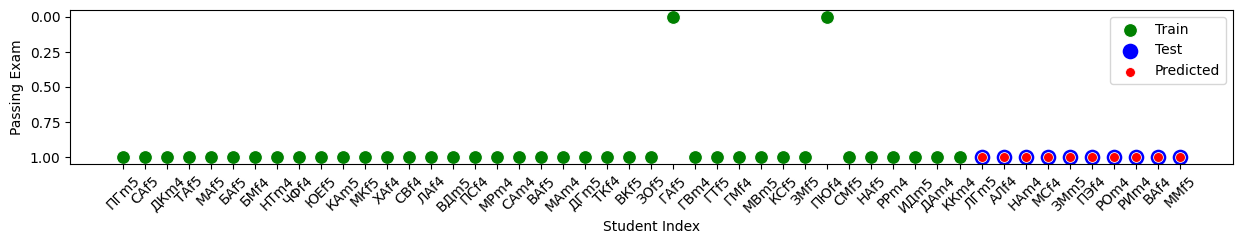

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [62]:
# Define features and target variable
cols = ['Sex_m', 'Group', 'Campus work_diff', 'Programming skills_diff', 'Activity_diff', 'Test_diff', 'Bonus task_diff', 'Attestation_diff']
X = dfrm_normalized[cols]
y = (dfrm_normalized['Exam'] > 0.0).astype(int)  # Assuming passing the exam (Exam > 2) is the target event

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression() #class_weight = 'balanced', C=0.8, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)
# Visualization of classification results with student indices
plt.figure(figsize=(15, 2))
stud_test = X_test.index
stud_train = X_train.index
sns.scatterplot(x=stud_train, y=y_train, s=100, color='g', label='Train')
g = sns.scatterplot(x=stud_test, y=y_test, s=150, color='b', label='Test')
g = sns.scatterplot(x=stud_test, y=y_pred, s=50, color='r', label='Predicted')
plt.gca().invert_yaxis()  # Flip the y-axis
plt.xlabel('Student Index')
plt.ylabel('Passing Exam')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis tick labels
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter to 1 to avoid warnings
recall = recall_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter to 1 to avoid warnings
f1 = f1_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter to 1 to avoid warnings

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

In [63]:
# Assuming you have feature_names and feature_importance obtained from your analysis
feature_importance = abs(model.coef_)
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance[0]})

# Sort the DataFrame by Importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance DataFrame
print(feature_importance_df)

                   Feature  Importance
5                Test_diff    0.566530
0                    Sex_m    0.468889
3  Programming skills_diff    0.319827
2         Campus work_diff    0.238781
4            Activity_diff    0.198246
7         Attestation_diff    0.133684
1                    Group    0.115494
6          Bonus task_diff    0.029099


In [64]:
# Assuming you have feature_names, X, and y obtained from your analysis

for feature in X.columns:
    feature_data = X[feature]

    # Filter the feature_data based on y values being 0 or 1
    data_group_0 = feature_data[y == 0]
    data_group_1 = feature_data[y == 1]

    t_stat, p_value = stats.ttest_ind(data_group_0, data_group_1)
    print(f"t-test for feature {feature}: t-statistic = {t_stat:.2f}, p-value = {p_value:.2f}")

t-test for feature Sex_m: t-statistic = -1.17, p-value = 0.25
t-test for feature Group: t-statistic = 0.06, p-value = 0.96
t-test for feature Campus work_diff: t-statistic = -0.65, p-value = 0.52
t-test for feature Programming skills_diff: t-statistic = -0.89, p-value = 0.38
t-test for feature Activity_diff: t-statistic = 0.52, p-value = 0.60
t-test for feature Test_diff: t-statistic = 1.99, p-value = 0.05
t-test for feature Bonus task_diff: t-statistic = 0.01, p-value = 0.99
t-test for feature Attestation_diff: t-statistic = 0.78, p-value = 0.44


# Linear Regression

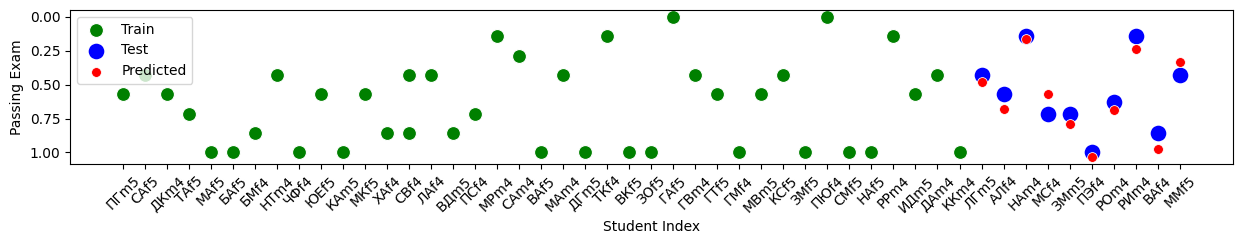

Mean Absolute Error: 0.07990476567401948
Mean Squared Error: 0.0078000055049659844
Root Mean Squared Error: 0.08831763982900576
R squared: 0.8911854373808982
model coefficients: [ 0.0629938  -0.0966994  -0.21425833 -0.04168702 -0.05802585  0.01719269
  0.34618839 -0.04544961 -0.01931894]


In [65]:
cols=['Group', 'Campus work_diff',	'Programming skills_diff',	'Activity_diff',	'Test_diff',	'Bonus task_diff',	'Attestation_diff', 'Sex_m','Rank']
X=dfrm_normalized[cols]
y=dfrm_normalized['Exam']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

# Прогнозы на тестовой выборке
y_pred = modelLR.predict(X_test)

# Построение графика результатов классификации с индексами студентов
plt.figure(figsize=(15, 2))
stud_test = X_test.index

stud_train= X_train.index
sns.scatterplot(x=stud_train, y=y_train, s=100, color='g', label='Train')

g=sns.scatterplot(x=stud_test, y=y_test, s=150, color='b', label='Test')  # Используем идентификаторы студентов вместо числовых значений на оси x
g= sns.scatterplot(x=stud_test, y=y_pred, s=50, color='r', label='Predicted')  # Используем идентификаторы студентов вместо числовых значений на оси x

# Flip the y-axis
plt.gca().invert_yaxis()

plt.xlabel('Student Index')
plt.ylabel('Passing Exam')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis tick labels
plt.show()

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R squared: {r_squared}')

print(f'model coefficients: {modelLR.coef_}')

In [66]:
# Assuming you have feature_names and feature_importance obtained from your analysis
feature_importance = abs(modelLR.coef_)
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance[0]})

# Sort the DataFrame by Importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance DataFrame
print(feature_importance_df)

                   Feature  Importance
0                    Group    0.062994
1         Campus work_diff    0.062994
2  Programming skills_diff    0.062994
3            Activity_diff    0.062994
4                Test_diff    0.062994
5          Bonus task_diff    0.062994
6         Attestation_diff    0.062994
7                    Sex_m    0.062994
8                     Rank    0.062994


In [67]:
male_data = dfrm_normalized[dfrm_normalized['Sex_m'] == 1]
female_data = dfrm_normalized[dfrm_normalized['Sex_m'] == 0]

# Perform t-tests for each feature
for feature in ['Group', 'Campus work_diff', 'Programming skills_diff', 'Activity_diff', 'Test_diff', 'Bonus task_diff', 'Attestation_diff', 'Rank']:
    t_statistic, p_value = stats.ttest_ind(male_data[feature], female_data[feature])
    print(f"t-test for feature {feature}: t-statistic = {t_statistic:.2f}, p-value = {p_value:.2f}")


t-test for feature Group: t-statistic = -0.91, p-value = 0.37
t-test for feature Campus work_diff: t-statistic = -0.94, p-value = 0.35
t-test for feature Programming skills_diff: t-statistic = 1.63, p-value = 0.11
t-test for feature Activity_diff: t-statistic = -1.22, p-value = 0.23
t-test for feature Test_diff: t-statistic = -2.83, p-value = 0.01
t-test for feature Bonus task_diff: t-statistic = 1.31, p-value = 0.20
t-test for feature Attestation_diff: t-statistic = -0.72, p-value = 0.47
t-test for feature Rank: t-statistic = 1.13, p-value = 0.26


# Clustering students with similar score patterns

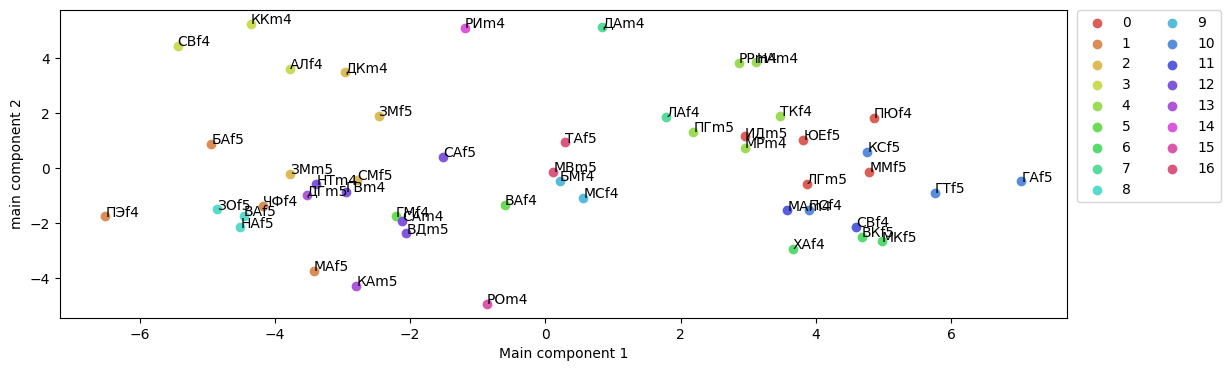

17
Inertia 297.90294107619405
Silhouette index 0.17345067444511436
Davis-Baldwin index 1.0634431111116556


In [68]:
df=dff.copy()
X = dff.drop(columns=['Sex', 'Index'], axis=1)
n_clusters = 17

kmeans = KMeans(n_clusters=n_clusters, n_init=1)
kmeans.fit(X)

clusters = kmeans.predict(X)

df['cluster'] = clusters
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(13, 4))
colors = sns.color_palette("hls", n_clusters)
for cluster_id in range(n_clusters):
    plt.scatter(X_2d[clusters == cluster_id, 0], X_2d[clusters == cluster_id, 1], label=f'{cluster_id}', c=[colors[cluster_id]])
    for index, (x, y) in enumerate(X_2d[clusters == cluster_id]):
        plt.text(x, y, str(df[df['cluster'] == cluster_id]['Index'].values[index]))
plt.xlabel('Main component 1')
plt.ylabel('main component 2')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., ncol=2)
plt.show()

print(n_clusters)
print('Inertia',kmeans.inertia_)
print('Silhouette index', metrics.silhouette_score(X, clusters))
print('Davis-Baldwin index',metrics.davies_bouldin_score(X, clusters))


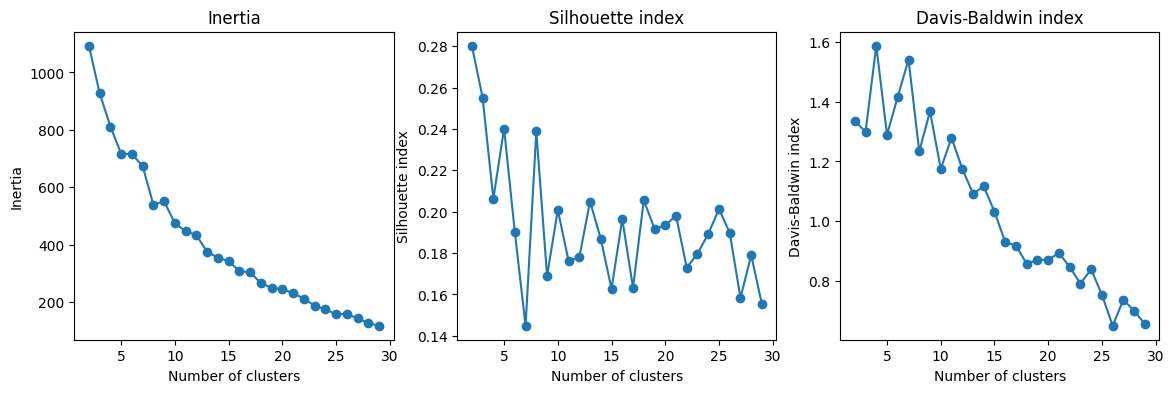

In [69]:
inertia_values = []
silhouette_scores = []
davies_bouldin_scores = []
number=30
for n in range(2, number):
    kmeans = KMeans(n_clusters=n, n_init=1)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_score = metrics.silhouette_score(X, clusters)
    silhouette_scores.append(silhouette_score)

    inertia_values.append(kmeans.inertia_)
    davies_bouldin_score = metrics.davies_bouldin_score(X, clusters)
    davies_bouldin_scores.append(davies_bouldin_score)

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(range(2, number), inertia_values, marker='o')
plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(range(2, number), silhouette_scores, marker='o')
plt.title('Silhouette index')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette index')

plt.subplot(1, 3, 3)
plt.plot(range(2, number), davies_bouldin_scores, marker='o')
plt.title('Davis-Baldwin index')
plt.xlabel('Number of clusters')
plt.ylabel('Davis-Baldwin index')

plt.show()